In [1]:
cd "G:/My Drive/projects/table-qa-in-ecommerce"

G:\My Drive\projects\table-qa-in-ecommerce


In [2]:
from tqdm.auto import tqdm
import os
import json

c:\Users\namge\anaconda3\envs\env01\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from src.data.utils_data import get_qna_path_mapping

In [4]:
PRODUCT_DATA_PATHS = {
    'phone': 'save/output-scraping-tgdd/product_data/phone_products_20240406_203410.json',
    'tablet': 'save/output-scraping-tgdd/product_data/tablet_products_20240406_211406.json',
    'laptop': 'save/output-scraping-tgdd/product_data/laptop_products_20240407_113058.json'
    }


QNA_DIRS = {

    'phone': 'save/data-synthesis/qna_dtdd__1_20apq_1/20240406',
    'tablet': 'save/data-synthesis/qna_tablet_1_20apq/20240407',
    'laptop': 'save/data-synthesis/qna_laptop_1_20apq/20240407'

}

# Count product, question, answers

In [5]:
laptop_qna_path_mapping = get_qna_path_mapping(QNA_DIRS['laptop'])
phone_qna_path_mapping = get_qna_path_mapping(QNA_DIRS['phone'])
tablet_qna_path_mapping = get_qna_path_mapping(QNA_DIRS['tablet'])

In [6]:
len(laptop_qna_path_mapping), len(phone_qna_path_mapping), len(tablet_qna_path_mapping)

(30, 99, 29)

In [7]:
def count_qa(qna_dirs):
    total_qa_count = 0
    qa_count_per_file = {}
    qa_counts = {}
    
    # Iterate over each Q&A directory
    for product_type, qna_dir in qna_dirs.items():
        qa_counts[product_type] ={}

        
        # Iterate over each Q&A file in the directory
        all_qna_paths = [fp for fp in os.listdir(qna_dir) if fp.endswith('.json')]
        print(len(all_qna_paths))
        for filename in tqdm(all_qna_paths):
                filepath = os.path.join(qna_dir, filename)
                with open(filepath, 'r', encoding='utf-8') as qna_file:
                    qna_data = json.load(qna_file)
                    qa_count = len(qna_data.get('questions', []))
                    qa_counts[product_type][filename] = qa_count

                    total_qa_count += qa_count
    
    return total_qa_count, qa_counts

# Count the number of QA pairs in each file
total_qa_count, qa_counts = count_qa(QNA_DIRS)

# # Display the results
# for product_type, counts_per_file in qa_counts.items():
#     print(f"Product Type: {product_type}")
#     for filename, count in counts_per_file.items():
#         print(f"  {filename}: {count} QA pairs")


99


 27%|██▋       | 27/99 [00:00<00:00, 130.37it/s]

100%|██████████| 99/99 [00:00<00:00, 122.29it/s]


29


100%|██████████| 29/29 [00:00<00:00, 101.33it/s]


30


100%|██████████| 30/30 [00:00<00:00, 81.50it/s]


In [8]:
for product_type in qa_counts:
    print(sum(qa_counts[product_type].values()))

1488
668
527


In [ ]:
qa_counts

In [10]:
print(str(qa_counts))

{'phone': {'qna_dtdd-oppo-a38-6gb_20240406_195953.json': 13, 'qna_dtdd-vivo-y36-128gb_20240406_200214.json': 15, 'qna_dtdd-oppo-a57-128gb_20240406_200138.json': 15, 'qna_dtdd-vivo-y17s_20240406_200155.json': 10, 'qna_dtdd-oppo-reno11-pro_20240406_200243.json': 20, 'qna_dtdd-iphone-14-pro-max_20240406_195933.json': 20, 'qna_dtdd-iphone-13_20240406_195353.json': 20, 'qna_dtdd-realme-note-50-64gb_20240406_195327.json': 12, 'qna_dtdd-xiaomi-redmi-note-13_20240406_195411.json': 12, 'qna_dtdd-realme-c55_20240406_195431.json': 15, 'qna_dtdd-oppo-reno11_20240406_195256.json': 10, 'qna_dtdd-oppo-find-n3-flip-hong_20240406_201351.json': 12, 'qna_dtdd-iphone-14-pro-256gb_20240406_201325.json': 20, 'qna_dtdd-oppo-find-n3_20240406_201244.json': 20, 'qna_dtdd-samsung-galaxy-z-fold5_20240406_201304.json': 12, 'qna_dtdd-oppo-a18_20240406_195910.json': 12, 'qna_dtdd-vivo-y03_20240406_195311.json': 10, 'qna_dtdd-realme-c51_20240406_200944.json': 20, 'qna_dtdd-samsung-galaxy-a25-8gb_20240406_195836.json'

In [11]:
from src.data.utils_data import plot_qa_counts, plot_histogram_qa_counts

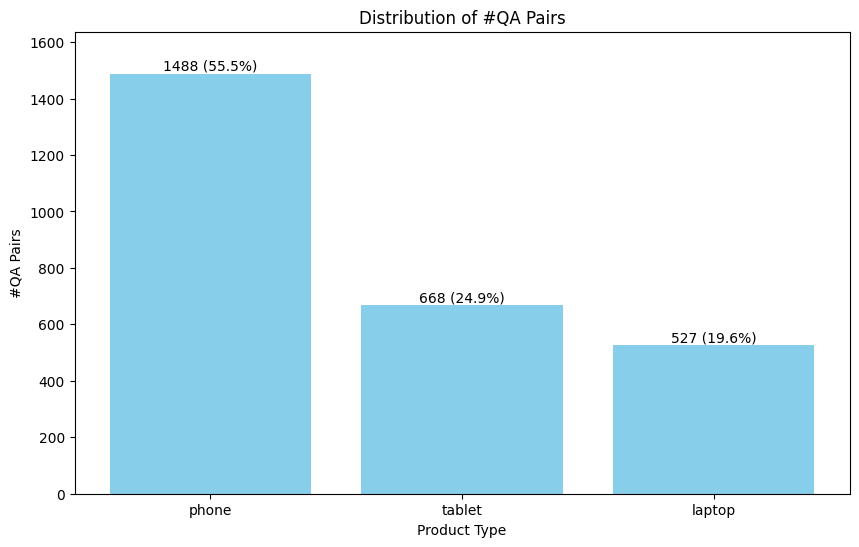

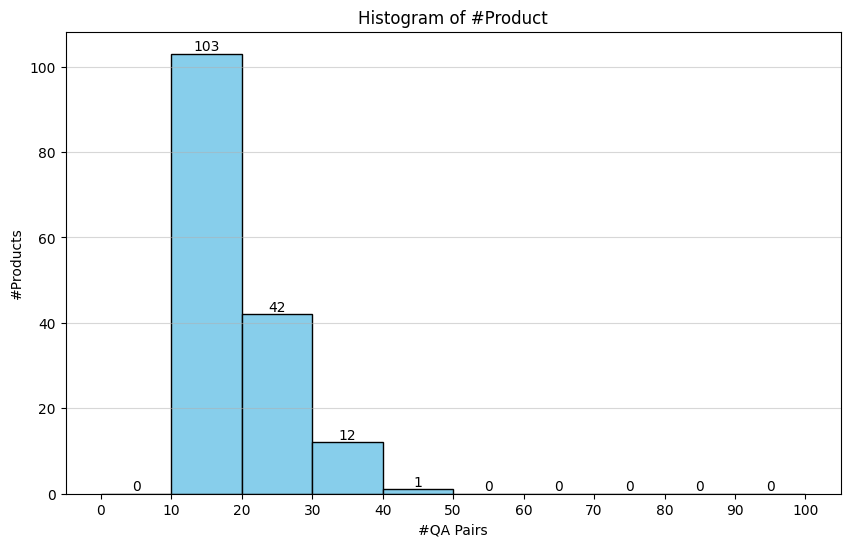

(None, None)

In [12]:
plot_qa_counts(qa_counts), plot_histogram_qa_counts(qa_counts)